In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

from tqdm.notebook import tqdm

## Pure with both particles on boundary together

$$\rho  = \vert 0, 1 \rangle \langle 0, 1 \vert$$

In [2]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in tqdm(ns):
    s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 15min 1s, sys: 10.3 s, total: 15min 12s
Wall time: 40.1 s


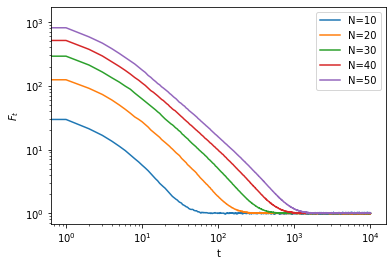

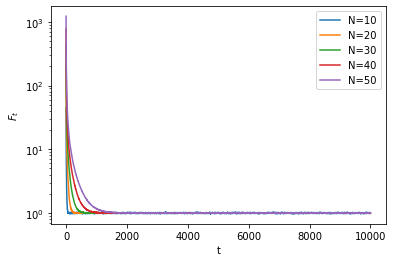

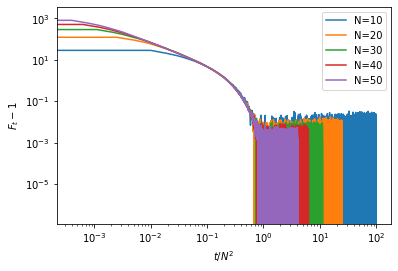

In [3]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure with both particles on boundary at opposite ends

$$ \rho = \vert 0, (N-1) \rangle \langle 0, (N-1) \vert $$

In [4]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in tqdm(ns):
    s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 14min 50s, sys: 11.9 s, total: 15min 2s
Wall time: 42.5 s


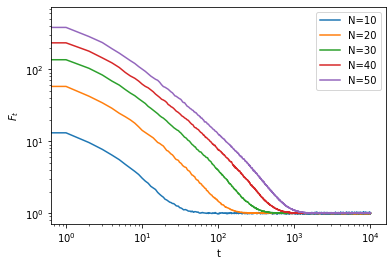

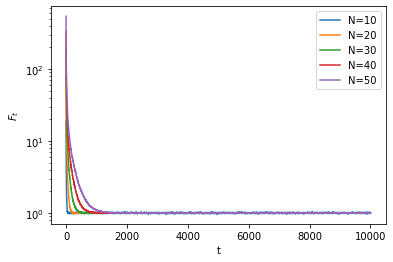

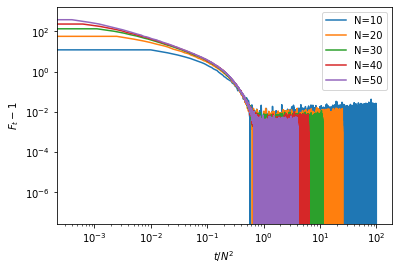

In [5]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()


for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure uniformly delocalized pair

$$ \rho = \frac{1}{D}\left( \sum_{a<b} \vert a, b \rangle \right)\left( \sum_{a<b} \langle a, b \vert \right) $$

In [ ]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

initial_purities = []
all_purities = []
for n in tqdm(ns):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.plot(ns, numpy.argmax(pure_purities, axis=1))
pyplot.xlabel('L')
pyplot.ylabel(r'argmax$_t~F_t$')
pyplot.grid()
pyplot.show()

## Uniformly delocalized pair with uniform random phases

$$ \rho = \frac{1}{D}\left( \sum_{a<b} e^{i \theta_{a,b}} \vert a, b \rangle \right)\left( \sum_{a<b} \langle a, b \vert  e^{-i \theta_{a,b}}  \right) $$

In [ ]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

initial_purities = []
all_purities = []
for n in tqdm(ns):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.exp(1.0j * numpy.random.uniform(0, 2*numpy.pi, size=(D,)))
    amplitudes = amplitudes / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

In [ ]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Uniformly delocalized pair with gaussian random phases

$$ \rho = \frac{1}{D}\left( \sum_{a<b} e^{i \theta_{a,b}} \vert a, b \rangle \right)\left( \sum_{a<b} \langle a, b \vert  e^{-i \theta_{a,b}}  \right) $$

In [3]:
%%time

k = 10000
ne = 1000
n = 50
stds = numpy.linspace(0,numpy.pi,10)

initial_purities = []
all_purities = []
for std in tqdm(stds):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.exp(1.0j * numpy.random.normal(0, scale=std, size=(D,)))
    amplitudes = amplitudes / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 1h 7min 43s, sys: 1min 2s, total: 1h 8min 46s
Wall time: 3min 18s


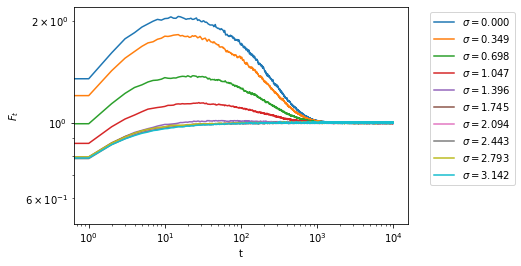

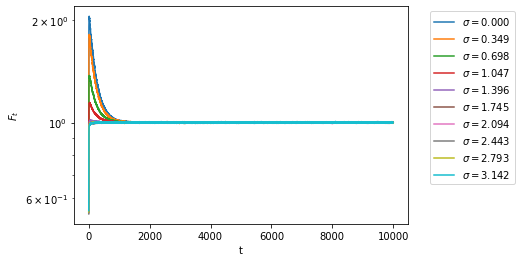

In [4]:
for std, purity in zip(stds, pure_purities):
    pyplot.plot(purity, label=r"$\sigma={:.3f}$".format(std))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for std, purity in zip(stds, pure_purities):
    pyplot.plot(purity, label=r"$\sigma={:.3f}$".format(std))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## "K mode"

$$\vert \psi_k \rangle = \sum_m e^{i \frac{\pi k m}{D}} \vert a(m), b(m) \rangle$$

In [ ]:
%%time

k = 10000
ne = 1000
n = 50
momentums = numpy.linspace(0,2,10)

initial_purities = []
all_purities = []
for p in tqdm(momentums):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.exp(1.0j  * p * numpy.pi / D * numpy.arange(0,D))
    amplitudes = amplitudes / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

In [ ]:
for p, purity in zip(momentums, pure_purities):
    pyplot.plot(purity, label=r"$k={:.3f}$".format(p))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for p, purity in zip(momentums, pure_purities):
    pyplot.plot(purity, label=r"$k={:.3f}$".format(p))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## Shuffled K mode
Take the same set of phases as a k mode, but randomly reassign where they go

$$\vert \psi_k \rangle = \sum_m e^{i \frac{\pi k S(m)}{D}} \vert a(m), b(m) \rangle$$

In [ ]:
%%time

k = 10000
ne = 1000
n = 50
momentums = numpy.linspace(0,2,10)

initial_purities = []
all_purities = []
for p in tqdm(momentums):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.exp(1.0j  * p * numpy.pi / D * numpy.arange(0,D))
    numpy.random.shuffle(amplitudes)
    amplitudes = amplitudes / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

In [ ]:
for p, purity in zip(momentums, pure_purities):
    pyplot.plot(purity, label=r"$k={:.3f}$".format(p))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for p, purity in zip(momentums, pure_purities):
    pyplot.plot(purity, label=r"$k={:.3f}$".format(p))
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## Site-wise random phases

$$\vert \psi \rangle = \sum_{a<b} e^{i (\theta_a + \theta_b)} \vert a,b\rangle$$

In [ ]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)
momentums = numpy.linspace(0,2,10)

initial_purities = []
all_purities = []
for n in tqdm(ns):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    input_states = numpy.asarray(input_states)
    D = len(input_states)
    
    random_phases = numpy.exp(1.0j * numpy.random.uniform(0,2*numpy.pi, size=(n,)))
    phase_a = random_phases[input_states[:,0]]
    phase_b = random_phases[input_states[:,1]]
    amplitudes = phase_a * phase_b
    amplitudes = amplitudes / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    initial_purities.append(s.get_mean_purity())
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
initial_purities = numpy.array(initial_purities)
pure_purities = numpy.array(all_purities)

In [ ]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure delocalized pair with minimum distance

$$ \rho_\Delta = \frac{1}{D}\left( \sum_{a+\Delta<b} \vert a, b \rangle \right)\left( \sum_{a+\Delta<b} \langle a, b \vert \right) $$

In [ ]:
%%time

k = 10000
ne = 1000
n = 50
deltas = 2*numpy.arange(0,11)

all_purities = []
for delta in tqdm(deltas):
    input_states = []
    for i in range(n):
        for j in range(i+1+delta,n):
            input_states.append([i,j])
    n_states = len(input_states)
    D = py_entropy.MultiDefectState.gen_enumerated_states(n,2).shape[0]
    amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(n_states)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_delta_purities = numpy.array(all_purities)

In [ ]:
for delta, purity in zip(deltas, pure_delta_purities):
    pyplot.plot(purity, label=fr"$\Delta={delta}$")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for delta, purity in zip(deltas, pure_delta_purities):
    pyplot.plot(purity, label=fr"$\Delta={delta}$")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for delta, purity in zip(deltas, pure_delta_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=fr"$\Delta={delta}$")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

for delta, purity in zip(deltas, pure_delta_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n), purity - 1, label=fr"$\Delta={delta}$")
    
pyplot.xlabel('$t/N$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05,1.0))
pyplot.show()

## Mixed with delocalized pair

$$ \rho =  \frac{1}{D} \sum_{a<b} \vert a,b \rangle \langle a,b \vert $$

In [10]:
%%time

k = 100
ne = 100
ns = 10*numpy.arange(1,6)

all_purities = []
for n in tqdm(ns):
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    input_states = numpy.asarray(input_states, dtype=numpy.uint64)
    input_states = numpy.expand_dims(input_states, axis=1)
    probs = numpy.ones((D,)) / D
    amplitudes = numpy.ones((D, 1), dtype=numpy.complex128)
    
    s = py_entropy.MultiDefectState.new_mixed(input_states, probs, amplitudes, n, 2, 
                                              num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(purities)
pure_purities = numpy.array(all_purities)

CPU times: user 1h 36min 8s, sys: 20.2 s, total: 1h 36min 28s
Wall time: 5min 11s


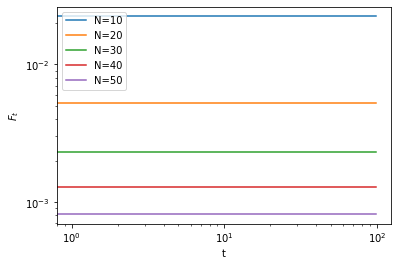

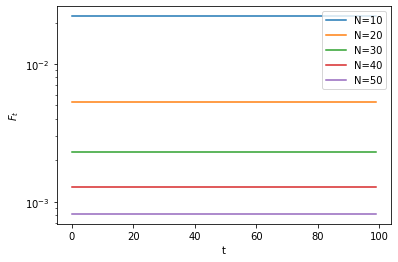

In [11]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()